In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('data_science_job.csv')

In [ ]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().sum().sum()

np.int64(21555)

In [ ]:
df.shape

(19158, 13)

In [ ]:
df.isnull().mean()*100   # CCA can be applied for data which contains less than 5% missing data

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
colums=[i for i in df.columns if df[i].isnull().mean() < 0.05 and df[i].isnull().mean() > 0]

In [ ]:
colums

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[colums].head(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [ ]:
df['enrolled_university'].value_counts()/len(df)

,count
enrolled_university,
no_enrollment,0.721213
Full time course,0.196106
Part time course,0.062533


In [ ]:
df['education_level'].value_counts()/len(df)

,count
education_level,
Graduate,0.605387
Masters,0.227633
High School,0.105282
Phd,0.021610
Primary School,0.016077


In [ ]:
len(df[colums].dropna())/len(df)

0.8968577095730244

In [ ]:
df_new=df[colums].dropna()

In [ ]:
df_new.shape, df.shape

((17182, 5), (19158, 13))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

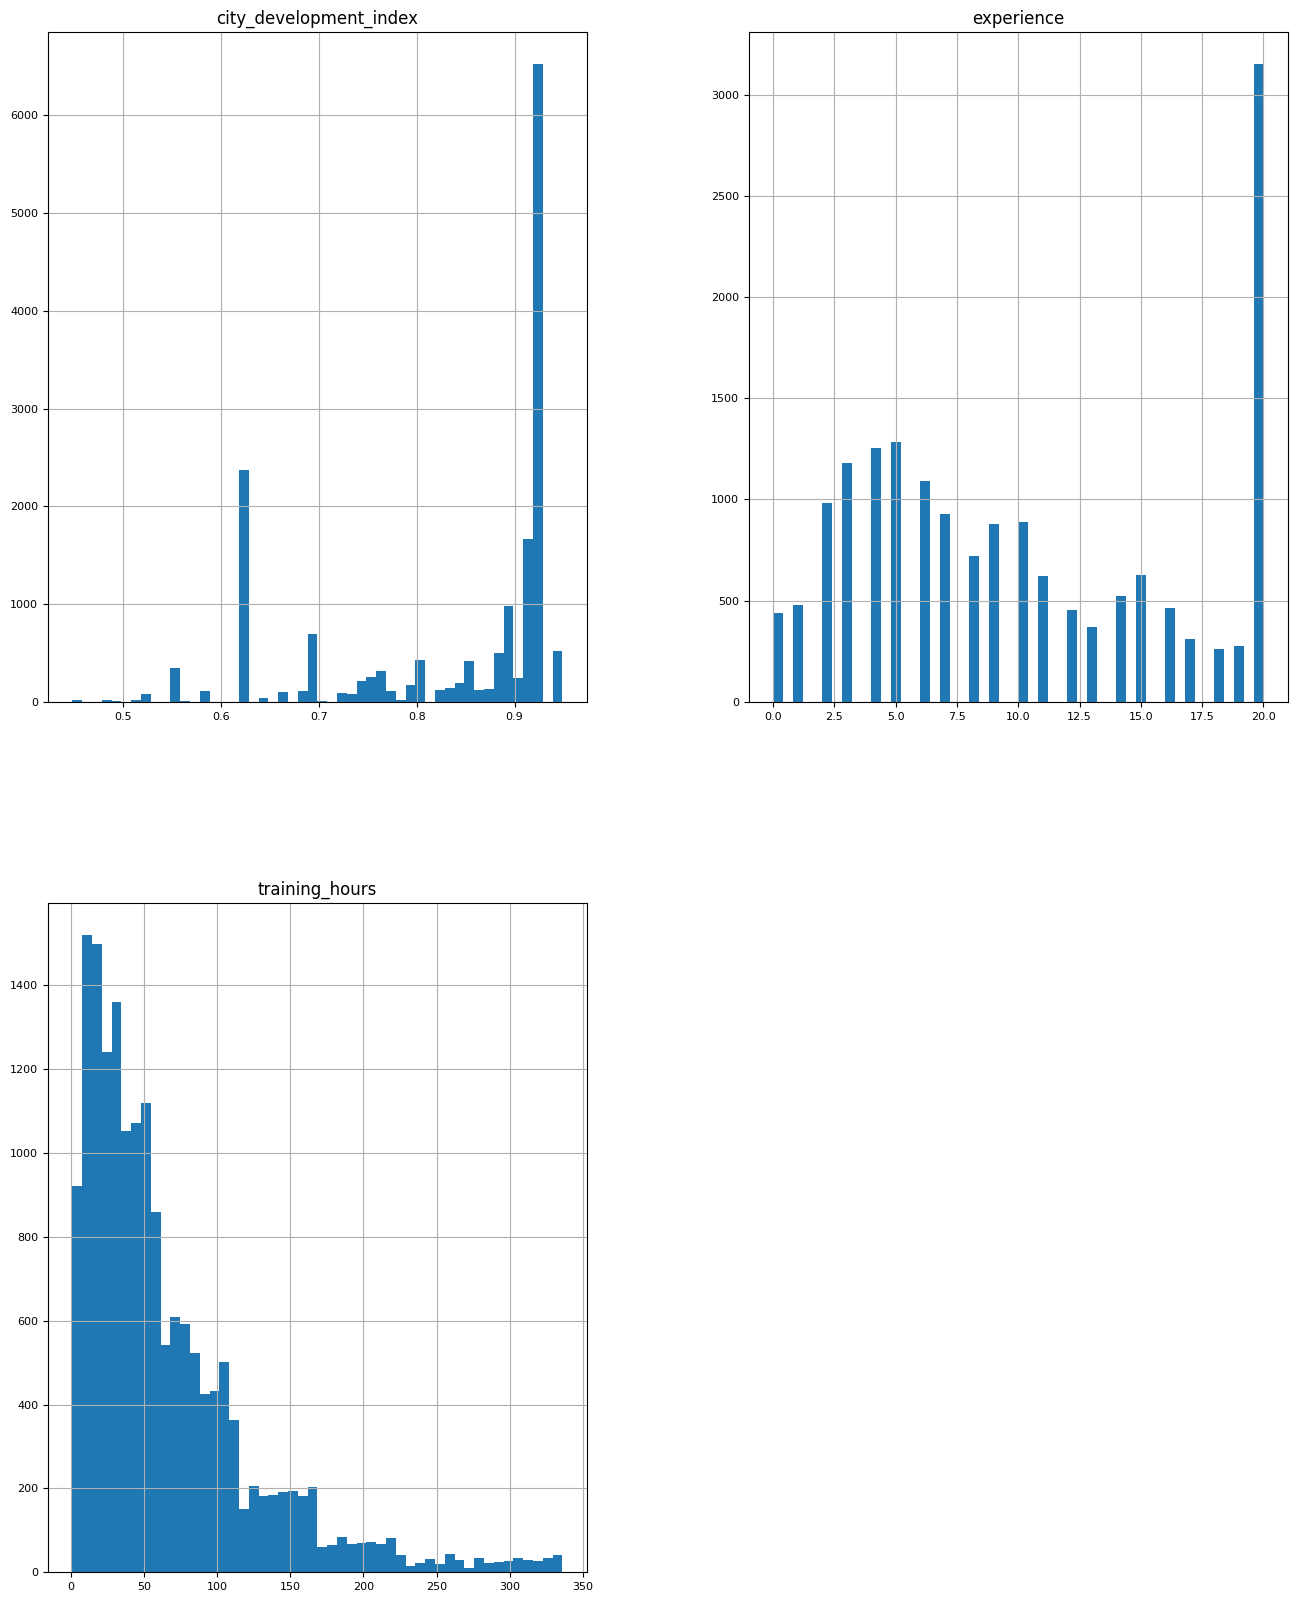

In [ ]:
df_new.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: >

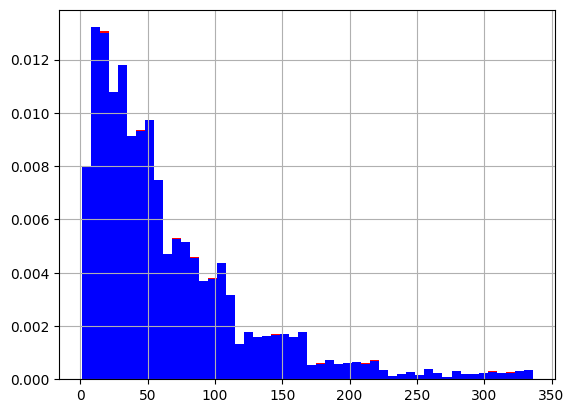

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')
df_new['training_hours'].hist(bins=50, ax=ax, density=True, color='blue')
